In [22]:
import pandas as pd
import gzip
import re
from string import punctuation
import time
from nltk import tokenize
import gensim
from nltk.corpus import stopwords
from collections import Counter
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pprint

## Modelagem de Assuntos
1. Usando a biblioteca Gensim, treine um modelo LSI e LDA para o seu corpus propondo uma metodologia para otimizaçao do numero de assuntos

Lendo a base de dados

In [2]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient = 'index')

df = getDF('reviews_Video_Games_5.json.gz')

Tokenizando o texto, colocando em caixa baixa, removendo stop words, termos de um caracter e termos que apareceram menos do que 20 vezes.

In [3]:
textos = list(df['reviewText'])

sw = stopwords.words('english') + list(punctuation)

textos_limpos = []
c = Counter([])
for texto in textos:
    tlimpo = [token.lower() for token in tokenize.TweetTokenizer().tokenize(texto) if token.lower() not in sw]
    c.update(tlimpo)
    textos_limpos.append(tlimpo)
textos_limpos = [[token for token in t if (c[token] >= 20 and len(token) > 1)] for t in textos_limpos]

dicionario = corpora.Dictionary(textos_limpos)

corpus = [dicionario.doc2bow(d) for d in textos_limpos]

Ajustando vários modelos lsi e lda e verificando a medida de coerência deles.

In [4]:
start_time = time.time()
lsi = []
lda = []
co_lsi = []
co_lda = []
for i in range(2, 16): 
    print(i)
    tmp_lsi = models.LsiModel(corpus, id2word = dicionario, num_topics = i)
    coherencemodel = CoherenceModel(model = tmp_lsi, texts = textos_limpos, dictionary = dicionario, coherence = 'c_v')
    lsi.append(tmp_lsi)
    co_lsi.append(coherencemodel.get_coherence())
    tmp_lda = models.LdaModel(corpus, id2word = dicionario, num_topics = i)
    coherencemodel = CoherenceModel(model = tmp_lda, texts = textos_limpos, dictionary = dicionario, coherence = 'c_v')
    lda.append(tmp_lda)
    co_lda.append(coherencemodel.get_coherence())
end_time = time.time()
end_time - start_time

2
3
4
5
6
7
8
9
10
11
12
13
14
15


10046.773110866547

In [5]:
co_lsi

[0.2812988744071294,
 0.292041947640904,
 0.3121273298884999,
 0.32222181448224263,
 0.3415945729065559,
 0.33214012345536437,
 0.31686204201643453,
 0.33403277361537714,
 0.3194217822647305,
 0.33383854645216077,
 0.36424640720771523,
 0.3266389654015859,
 0.3219167728656445,
 0.3269672035913947]

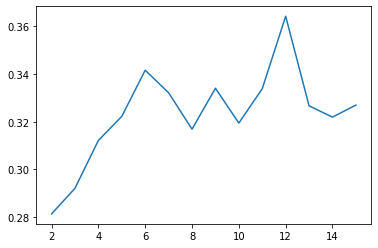

In [17]:
plt.plot(list(range(2,16)), co_lsi)

In [6]:
co_lda

[0.2809067573908819,
 0.30880259414054034,
 0.2994828072091644,
 0.3089147522730547,
 0.32244689438215657,
 0.32096699173333476,
 0.3347581044356133,
 0.3309967496324424,
 0.3411132402912534,
 0.3461663444793461,
 0.36437488653445765,
 0.37018352902233376,
 0.3736342023356068,
 0.3544443289567253]

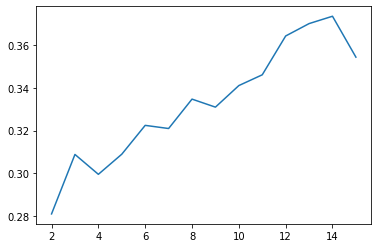

In [18]:
plt.plot(list(range(2,16)), co_lda)

In [25]:
best_lsi = lsi[10]
best_lda = lda[12]

In [32]:
best_lsi.print_topics()

[(0, '0.702*"game" + 0.201*"like" + 0.170*"one" + 0.153*"get" + 0.151*"games" + 0.125*"play" + 0.117*"really" + 0.116*"time" + 0.100*"good" + 0.100*"also"'), (1, '-0.673*"game" + 0.243*"games" + 0.226*"like" + 0.223*"one" + 0.158*"get" + 0.115*"also" + 0.105*"new" + 0.103*"really" + 0.102*"..." + 0.096*"use"'), (2, '-0.656*"games" + 0.287*"..." + -0.218*"wii" + -0.175*"mario" + -0.160*"play" + 0.158*"get" + -0.123*"nintendo" + -0.113*"xbox" + 0.107*"story" + -0.104*"ps3"'), (3, '0.874*"..." + 0.140*"games" + 0.134*".." + -0.118*"also" + -0.095*"characters" + -0.089*"story" + -0.083*"enemies" + -0.083*"one" + -0.082*"character" + -0.069*"level"'), (4, '0.506*"like" + -0.418*"mario" + -0.277*"..." + -0.227*"one" + -0.209*"super" + -0.178*"new" + 0.140*"really" + -0.118*"characters" + -0.109*"time" + -0.109*"nintendo"'), (5, '-0.539*"like" + -0.529*"mario" + 0.314*"one" + -0.257*"super" + 0.162*"xbox" + -0.148*"wii" + -0.136*"really" + -0.120*"nintendo" + 0.114*"games" + 0.112*"ps3"'), (6

In [33]:
best_lda.print_topics()

[(0, '0.026*"xbox" + 0.020*"controller" + 0.015*"one" + 0.014*"ps3" + 0.014*"games" + 0.012*"360" + 0.012*"console" + 0.011*"system" + 0.010*"use" + 0.010*"great"'), (1, '0.019*"mouse" + 0.015*"button" + 0.012*"use" + 0.012*"screen" + 0.010*"kinect" + 0.010*"buttons" + 0.009*"right" + 0.007*"move" + 0.007*"control" + 0.006*"using"'), (2, '0.027*"game" + 0.025*"dlc" + 0.021*"version" + 0.017*"batman" + 0.015*"like" + 0.015*"fighting" + 0.014*"characters" + 0.013*"arkham" + 0.012*"mode" + 0.012*"games"'), (3, '0.058*"game" + 0.033*"games" + 0.025*"ps4" + 0.023*"play" + 0.022*"fun" + 0.020*"wii" + 0.016*"great" + 0.015*"mario" + 0.014*"one" + 0.014*"like"'), (4, '0.034*"game" + 0.017*"like" + 0.012*"really" + 0.010*"i\'m" + 0.010*"get" + 0.010*"one" + 0.009*"would" + 0.008*"time" + 0.007*"even" + 0.007*"much"'), (5, '0.018*"weapons" + 0.015*"call" + 0.015*"duty" + 0.014*"game" + 0.013*"like" + 0.013*"missions" + 0.012*"battlefield" + 0.011*"enemies" + 0.011*"kill" + 0.011*"enemy"'), (6, '